# Monthly Unique Devices on Wikipedias #

In [1]:
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(tidyverse); library(ggplot2); library(wmf)
})


In [2]:
query <- "
SELECT
  year, month, CONCAT(year,'-',LPAD(month,2,'0')) AS date,
  SUM(uniques_estimate) as unique_devices
FROM 
	wmf.unique_devices_per_project_family_monthly
WHERE year >= 2018 
  AND project_family = 'wikipedia'
GROUP BY year, month ORDER BY year, month LIMIT 1000;"

In [3]:
unique_devices_monthly <- wmf::query_hive(query)

In [4]:
# Calculate total monthly unique devices with yoy changes
unique_devices_summary <- unique_devices_monthly  %>%
  select(-c(1,2)) %>%
  arrange(date) %>%
  mutate(unique_devices = unique_devices,
    yoy_percent = (unique_devices/lag(unique_devices,12) -1)*100)

knitr::kable(unique_devices_summary)



|date    | unique_devices| yoy_percent|
|:-------|--------------:|-----------:|
|2018-01 |     1554911548|          NA|
|2018-02 |     1487086660|          NA|
|2018-03 |     1577671296|          NA|
|2018-04 |     1522050732|          NA|
|2018-05 |     1562607664|          NA|
|2018-06 |     1481623542|          NA|
|2018-07 |     1484414539|          NA|
|2018-08 |     1516850100|          NA|
|2018-09 |     1609517085|          NA|
|2018-10 |     1646304870|          NA|
|2018-11 |     1584755682|          NA|
|2018-12 |     1589472863|          NA|
|2019-01 |     1584392317|    1.895977|
|2019-02 |     1531982663|    3.019058|
|2019-03 |     1636520495|    3.730131|
|2019-04 |     1581509035|    3.906460|
|2019-05 |     1594894475|    2.066213|
|2019-06 |     1506535565|    1.681400|
|2019-07 |     1502241031|    1.200911|

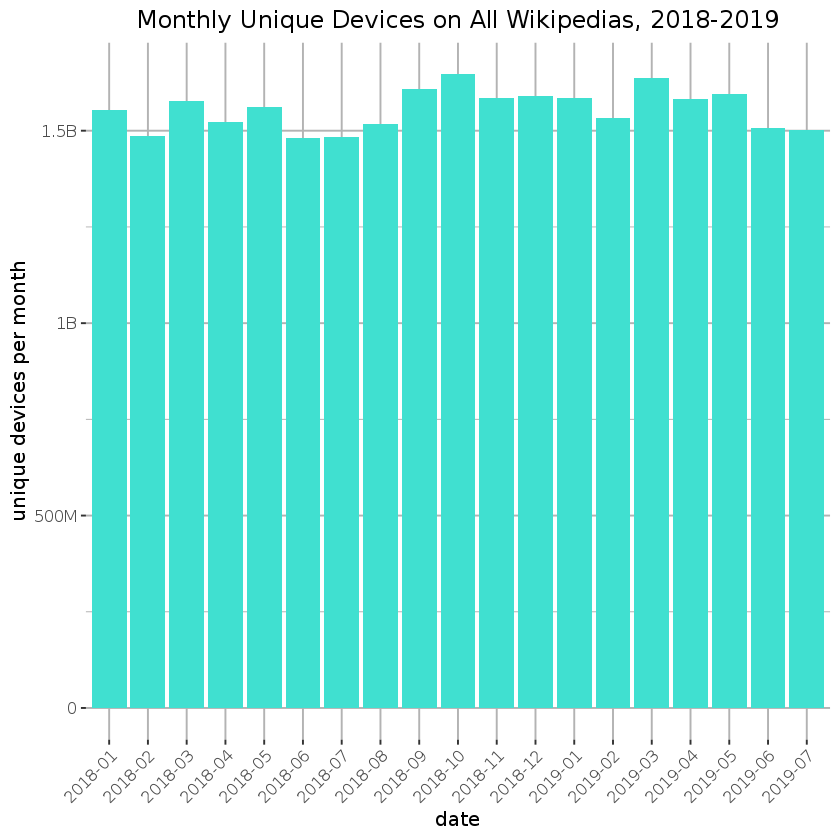

In [7]:
# Plot monthly unique devices 
p <- ggplot(unique_devices_summary, aes(x=date, y = unique_devices)) +  
  geom_col(fill= 'turquoise') +
  scale_y_continuous("unique devices per month", labels = polloi::compress) +
  labs(title = "Monthly Unique Devices on All Wikipedias, 2018-2019") +
  ggthemes::theme_tufte(base_size = 12, base_family = "Gill Sans") +
  theme(axis.text.x=element_text(angle = 45, hjust = 1),
        plot.title = element_text(hjust = 0.5),
        panel.grid = element_line("gray70"))

ggsave(filename="unqiue_devices_monthly.png", plot = p, path = "Figures", units = "in", dpi = 150, height = 6, width = 10, limitsize = FALSE)  
p